### Challenge 7 Topic:  Classification

**Settings:  Where applicable, use test_size=.30, random_state=4444.  This will permit comparison of results across users.

__Data:__  
Challenges 1-10:  congressional votes Congressional Voting Records Dataset  
Challenge 11:     movie data  
Challenge 12:     breast cancer surgery Haberman Survival Dataset  

In [425]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
from io import StringIO

from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.learning_curve import learning_curve

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.2)
plt.style.use('fivethirtyeight')
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D


__Challenge 1__

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [426]:
names=[
    'Handicapped-infants' ,
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa',
    'Class_Name'
    ]

In [427]:
df=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/house-votes-84.data',
               header=None, names=names)              
print(df.shape)
mapping = {'y': 1, 'n': 0, '?': None}
df.replace(mapping, inplace=True)
df.fillna(round(df.mean(), 2), inplace=True)
df.head()

(435, 17)


,Handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class_Name
0,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.36,1.00,1.0,1.0,0.0,1.00,republican.
1,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,1.00,1.0,1.0,0.0,0.81,republican.
2,0.44,1.0,1.0,0.42,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.0,1.0,0.0,0.00,democrat.
3,0.00,1.0,1.0,0.00,0.5,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.0,0.0,0.0,1.00,democrat.
4,1.00,1.0,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.42,1.0,1.0,1.0,1.00,democrat.


In [428]:
df['Class_Name']=[x.strip('.') for x in df['Class_Name']]
df['Class_Name'].value_counts()

democrat      267
republican    168
Name: Class_Name, dtype: int64

__Challenge 2__
Split the data into a test and training set.

In [429]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size =.30, random_state=4444)

__Challenge 3__  
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat). Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k.  
Which k value gives the highest accuracy?  k=2

In [430]:
ssX = StandardScaler()
X_train_scaled=ssX.fit_transform(X_train)
X_test_scaled=ssX.transform(X_test)

In [431]:
# Grid search for param selection
knn = KNeighborsClassifier()
k_range = list(range(1, 21))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [432]:
# grid.grid_scores_
# print(grid.grid_scores_[0].parameters)
# print(grid.grid_scores_[0].cv_validation_scores)
# print(grid.grid_scores_[0].mean_validation_score)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
y_pred=grid.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.947368421053
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


0.90839694656488545

__Challenge 4__  
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [433]:
lm = LogisticRegression()
c_range = [0.0001, 0.001,0.01, 0.1, 1.0, 10.]

grid = GridSearchCV(lm, param_grid={'C': c_range}, cv=10, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

y_pred=grid.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.973684210526
{'C': 1.0}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


0.93893129770992367

__Challenge 5__  
Make a bar graph of democrats and republicans. How many of each are there?  
Make a very simple predictor that predicts 'democrat' for every incoming example.  
Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.  
Do the same with predicting 'republican' all the time and measure its accuracy.

Text(0.5,1,'Number of Reps in each Party')

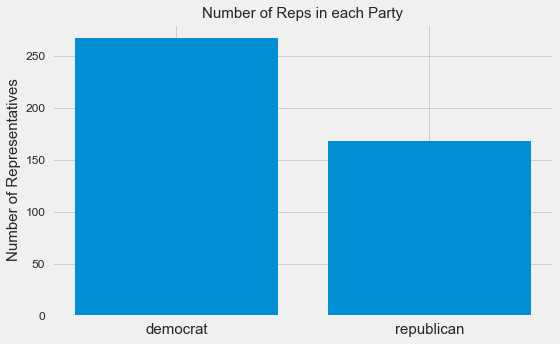

In [434]:
counts=df['Class_Name'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts)
plt.ylabel('Number of Representatives', size=15)
plt.xticks(fontsize=15, rotation=0)
plt.title('Number of Reps in each Party', size=15)

__Challenge 6__  
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [435]:
knn_accuracy=[]
k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_accuracy.append(accuracy_score(y_test, y_pred))
    
logistics_acc=[0.93893129770992367]*len(knn_accuracy)

pred_dem=['democrat']*len(y_test)
pred_rep=['republican']*len(y_test)

dem_acc=[accuracy_score(y_test, pred_dem)]*len(k_range)
rep_acc=[accuracy_score(y_test, pred_rep)]*len(k_range)

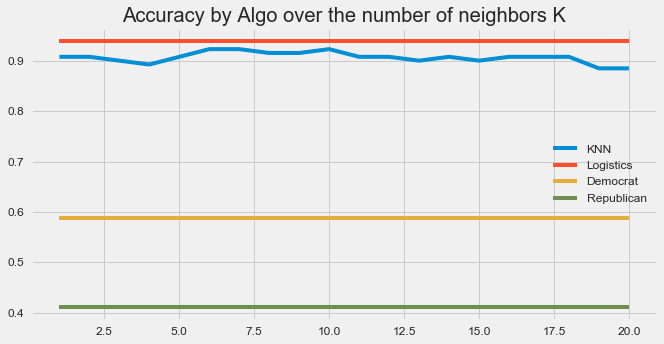

In [436]:
plt.figure(figsize=(10,5))
plt.title('Accuracy by Algo over the number of neighbors K')
plt.plot(k_range, knn_accuracy, label='KNN')
plt.plot(k_range, logistics_acc, label='Logistics' )
plt.plot(k_range, dem_acc, label='Democrat')
plt.plot(k_range, rep_acc, label='Republican')
plt.ylim=(0,1)
plt.legend(loc='center right')

__Challenge 7__ 

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

    from sklearn.learning_curve import learning_curve

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )

Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

    train_cv_err = np.mean(train_err, axis=1)
    test_cv_err = np.mean(ts_err, axis=1)

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [437]:
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator, X=X, y=y, cv=cv, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot
    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label='mean Training CV Score')
    plt.plot(train_sizes, test_scores_mean, label='mean Test CV Score')
    plt.xlabel("Training Sample Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')

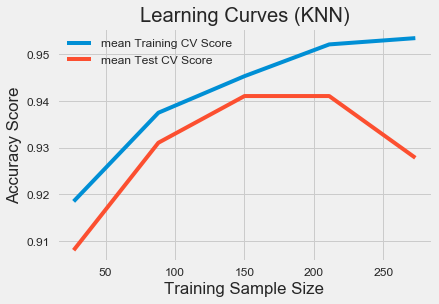

In [438]:
# train_sizes=[30, 50, 100, 150, 200, 250, 273]    
train_sizes=np.linspace(.1, 1.0, 5)
plot_learning_curve(estimator = KNeighborsClassifier(), 
                    title = "Learning Curves (KNN)",
                    X=X_train_scaled,
                    y=y_train,
                    cv=10,
                    train_sizes=train_sizes
                   )

__Challenge 8__  

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

    from sklearn.naive_bayes import GaussianNB

SVM (Support Vector Machine) Classifier

    from sklearn.svm import SVC

Decision Tree

    from sklearn.tree import DecisionTreeClassifier

Random Forest

    from sklearn.ensemble import RandomForestClassifier


In [439]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(clf, X_train, y_train, X_test, y_test):
    clf = clf()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return(accuracy_score(y_test, y_pred))

print("GaussianNB: ", models(GaussianNB, X_train_scaled, y_train, X_test_scaled, y_test))
print("SVC: ", models(SVC, X_train_scaled, y_train, X_test_scaled, y_test))
print("DecisionTreeClassifier: ", models(DecisionTreeClassifier, X_train_scaled, y_train, X_test_scaled, y_test))
print("RandomForestClassifier: ", models(RandomForestClassifier, X_train_scaled, y_train, X_test_scaled, y_test))

GaussianNB:  0.93893129771
SVC:  0.93893129771
DecisionTreeClassifier:  0.923664122137
RandomForestClassifier:  0.961832061069


__Challenge 9__  

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

    from sklearn.cross_validation import cross_val_score

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [440]:
def cv_models(clf, X_train, y_train, cv=10):
    return(cross_val_score(clf(), X_train, y_train, cv=cv, scoring='accuracy').mean())

print("GaussianNB: ", cv_models(GaussianNB, X_train_scaled, y_train))
print("SVC: ", cv_models(SVC, X_train_scaled, y_train))
print("DecisionTreeClassifier: ", cv_models(DecisionTreeClassifier, X_train_scaled, y_train))
print("RandomForestClassifier: ", cv_models(RandomForestClassifier, X_train_scaled, y_train))

GaussianNB:  0.921612903226
SVC:  0.967311827957
DecisionTreeClassifier:  0.934516129032
RandomForestClassifier:  0.954193548387


__Challenge 10__  

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [441]:
df=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/house-votes-84.data',
               header=None, names=names)              
print(df.shape)
mapping = {'y': 1, 'n': 0, '?': None}
df.replace(mapping, inplace=True)
df.drop(['Class_Name'], axis=1, inplace=True)
df.fillna(df.mode().ix[0], inplace=True)
df.head()

(435, 17)


,Handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [442]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:], df['Handicapped-infants'], test_size =.30, random_state=4444)
ssX = StandardScaler()
X_train_scaled=ssX.fit_transform(X_train)
X_test_scaled=ssX.transform(X_test)

In [443]:
print("GaussianNB: ", cv_models(GaussianNB, X_train_scaled, y_train))
print("SVC: ", cv_models(SVC, X_train_scaled, y_train))
print("DecisionTreeClassifier: ", cv_models(DecisionTreeClassifier, X_train_scaled, y_train))
print("RandomForestClassifier: ", cv_models(RandomForestClassifier, X_train_scaled, y_train))

GaussianNB:  0.684315906563
SVC:  0.678309232481
DecisionTreeClassifier:  0.691212458287
RandomForestClassifier:  0.663848720801


__Challenge 11__  

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [497]:
df_movies=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/2013_movies.csv')
df_movies.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


Text(0.5,1,'Number of Movies in each Rating')

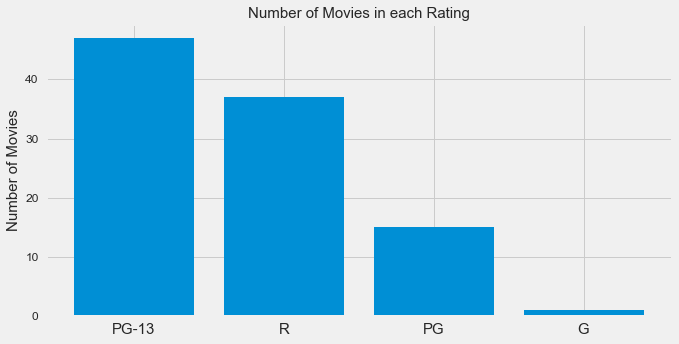

In [498]:
counts=df_movies['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts)
plt.ylabel('Number of Movies', size=15)
plt.xticks(fontsize=15, rotation=0)
plt.title('Number of Movies in each Rating', size=15)

In [499]:
df_movies.fillna(round(df_movies.mean(), 2), inplace=True)
cols=['Budget', 'DomesticTotalGross', 'Runtime']
# 'ReleaseDate', 'Director'

In [500]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_movies[cols], df_movies['Rating'], test_size =.30, random_state=4444)

In [502]:
# Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.
ssXm = StandardScaler()
Xm_train_scaled=ssXm.fit_transform(Xm_train)
Xm_test_scaled=ssXm.transform(Xm_test)

knn_m = KNeighborsClassifier()
k_range = list(range(1, 21))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
gridm = GridSearchCV(knn_m, param_grid, cv=10, scoring='accuracy')
gridm.fit(Xm_train_scaled, ym_train)

print(gridm.best_score_)
print(gridm.best_params_)
print(gridm.best_estimator_)

ym_pred=gridm.predict(Xm_test_scaled)
accuracy_score(ym_test, ym_pred)

0.571428571429
{'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')


0.53333333333333333

In [503]:
# Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.
y_predm2=list(['PG-13']*len(Xm_test_scaled))
accuracy_score(ym_test, y_predm2)

0.46666666666666667

__Challenge 12__  

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

- What is the average and standard deviation of the age of all of the patients?
- What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
- What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
- Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
- What is the earliest year of surgery in this dataset?
- What is the most recent year of surgery?
- Use logistic regression to predict survival after 5 years. How well does your model do?
- What are the coefficients of logistic regression? Which features affect the outcome how?
- Draw the learning curve for logistic regression in this case.

In [504]:
df_h=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/haberman.data', 
               header=None, names=['Age', 'Year', 'Nodes', 'Survival'])   
df_h.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [505]:
df_h['Survival'].value_counts()

1    225
2     81
Name: Survival, dtype: int64

In [506]:
# What is the average and standard deviation of the age of all of the patients?
df_h['Age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [507]:
# What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
df_h[df_h['Survival']==1]['Age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [508]:
# What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
df_h[df_h['Survival']==2]['Age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: Age, dtype: float64

(array([ 236.,   30.,   18.,    8.,    9.,    2.,    1.,    0.,    1.,    1.]),
 array([  0. ,   5.2,  10.4,  15.6,  20.8,  26. ,  31.2,  36.4,  41.6,
         46.8,  52. ]),
 <a list of 10 Patch objects>)

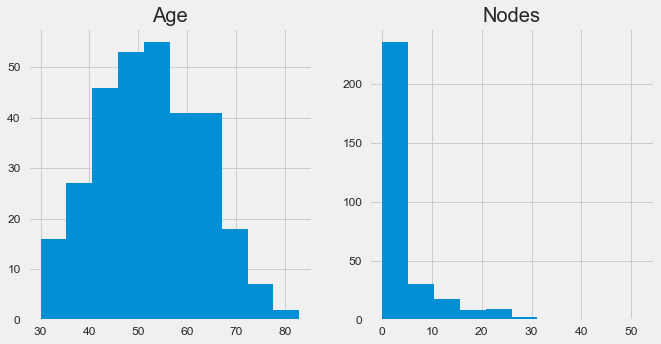

In [509]:
# Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
f, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,5))
f.subplots_adjust(hspace=0.3)
ax[0].set_title('Age')
ax[0].hist(df_h['Age'])
ax[1].set_title('Nodes')
ax[1].hist(df_h['Nodes'])

In [510]:
year=df_h.sort_values(by=['Year'])['Year']
# What is the earliest year of surgery in this dataset? - 1958
print("Earliest Year:", year.head(1)) 
# What is the most recent year of surgery? - 1969
print("Most Recent Year:", year.tail(1))

Earliest Year: 305    58
Name: Year, dtype: int64
Most Recent Year: 90    69
Name: Year, dtype: int64


In [548]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(df_h.iloc[:, :-1], df_h.iloc[:, -1], 
                                                    test_size = 0.3, random_state=4444)

In [549]:
# Use logistic regression to predict survival after 5 years. How well does your model do?
ssXh = StandardScaler()
Xh_train_scaled=ssXh.fit_transform(Xh_train)
Xh_test_scaled=ssXh.transform(Xh_test)

lm = LogisticRegression()
c_range = [0.0001, 0.001,0.01, 0.1, 1.0, 10.]

gridh = GridSearchCV(lm, param_grid={'C': c_range}, cv=10, scoring='accuracy')
gridh.fit(Xh_train_scaled, yh_train)

print(gridh.best_score_)
print(gridh.best_params_)
print(gridh.best_estimator_)

yh_pred=gridh.predict(Xh_test_scaled)
accuracy_score(yh_test, yh_pred)

0.700934579439
{'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


0.82608695652173914

In [550]:
# What are the features that contribute? Nodes matters the most, Year that surgery was operated mattered teh least
print(gridh.best_estimator_.intercept_)
gridh.best_estimator_.coef_
list(zip(Xh_train.columns, gridh.best_estimator_.coef_[0]))

[-0.28772723]


[('Age', 0.045954684925474783),
 ('Year', 0.0082615584952493611),
 ('Nodes', 0.17084805426530736)]

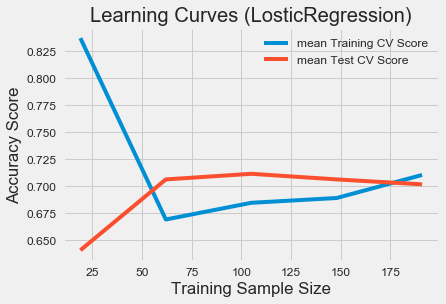

In [551]:
# Draw the learning curve for logistic regression in this case.
train_sizes=np.linspace(.1, 1.0, 5)
plot_learning_curve(estimator = gridh.best_estimator_, 
                    title = "Learning Curves (LosticRegression)",
                    X=Xh_train_scaled,
                    y=yh_train,
                    cv=10,
                    train_sizes=train_sizes
                   )

### Challenge 8 - Classification Error Metric Challenges

__Challenge 1__
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [421]:
#  accuracy, precision, recall and f1
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score

In [449]:
def models_clf(clf, X_train, y_train, X_test, y_test):
    clf = clf()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return({'model': clf,
          'accuracy': accuracy_score(y_test, y_pred),
          'precision': precision_score(y_test, y_pred),
          'recall': recall_score(y_test, y_pred),
          'f1': f1_score(y_test, y_pred),
          'ROC AUC': roc_auc_score(y_test, y_pred)
            }
          )

In [457]:
models_clf(GaussianNB, X_train_scaled, y_train, X_test_scaled, y_test)
models_clf(SVC, X_train_scaled, y_train, X_test_scaled, y_test)
models_clf(DecisionTreeClassifier, X_train_scaled, y_train, X_test_scaled, y_test)
models_clf(RandomForestClassifier, X_train_scaled, y_train, X_test_scaled, y_test)
models_clf(LogisticRegression, X_train_scaled, y_train, X_test_scaled, y_test)
models_clf(KNeighborsClassifier, X_train_scaled, y_train, X_test_scaled, y_test)

{'ROC AUC': 0.66232394366197189,
 'accuracy': 0.6717557251908397,
 'f1': 0.60550458715596334,
 'model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'precision': 0.67346938775510201,
 'recall': 0.55000000000000004}

__Challenge 2__ 
For each, draw the ROC curve and calculate the AUC.

In [462]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

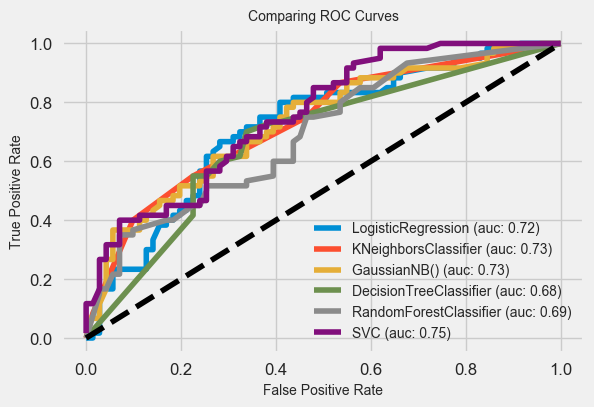

In [473]:
model_names=['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB()', 
             'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']
models=[LogisticRegression(), KNeighborsClassifier(), GaussianNB(), 
        DecisionTreeClassifier(), RandomForestClassifier(), SVC(probability=True)]
roc_plotting_stuff = []

for clf, name in zip(models, model_names):
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))

plt.figure(dpi=100)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=10)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate", fontsize=10)
plt.ylabel("True Positive Rate", fontsize=10)
plt.title("Comparing ROC Curves", fontsize=10);

__Challenge 3__  
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [496]:
scores=['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
for clf, name in zip(models, model_names):
    print()
    print(f"Model {name:15s}")
    for s in scores:
        score_list=cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring=s).mean()
        print(f"   Metric {s:15s} {score_list:4.2f}")


Model LogisticRegression
   Metric precision       0.68
   Metric recall          0.69
   Metric accuracy        0.74
   Metric f1              0.68
   Metric roc_auc         0.77

Model KNeighborsClassifier
   Metric precision       0.61
   Metric recall          0.53
   Metric accuracy        0.67
   Metric f1              0.56
   Metric roc_auc         0.73

Model GaussianNB()   
   Metric precision       0.60
   Metric recall          0.73
   Metric accuracy        0.68
   Metric f1              0.66
   Metric roc_auc         0.77

Model DecisionTreeClassifier
   Metric precision       0.64
   Metric recall          0.60
   Metric accuracy        0.70
   Metric f1              0.63
   Metric roc_auc         0.70

Model RandomForestClassifier
   Metric precision       0.61
   Metric recall          0.56
   Metric accuracy        0.67
   Metric f1              0.57
   Metric roc_auc         0.71

Model SVC            
   Metric precision       0.63
   Metric recall          0.56
   

__Challenge 4__
For your movie classifiers, calculate the precision and recall for each class.

In [533]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
gridm.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [534]:
pred_m=gridm.predict(Xm_train_scaled)
precision_score(ym_train, pred_m, average=None)
# Alphabetically sorted

array([ 0.        ,  1.        ,  0.575     ,  0.62068966])

In [535]:
recall_score(ym_train, pred_m, average=None)

array([ 0.        ,  0.125     ,  0.6969697 ,  0.64285714])

__Challenge 5__  
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [566]:
preds_h = gridh.predict_proba(Xh_test_scaled)
preds_h[:5]

array([[ 0.58591174,  0.41408826],
       [ 0.60040705,  0.39959295],
       [ 0.57835409,  0.42164591],
       [ 0.6001048 ,  0.3998952 ],
       [ 0.6027512 ,  0.3972488 ]])

In [569]:
yh_test[:5]-1

258    1
112    0
105    0
128    0
38     0
Name: Survival, dtype: int64

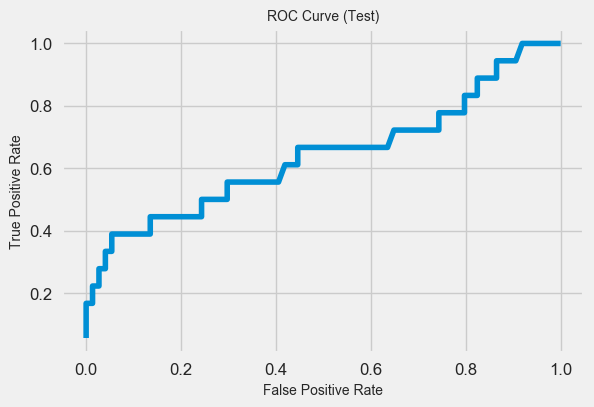

In [574]:
gridh.best_estimator_
preds_h = gridh.predict_proba(Xh_test_scaled)
fpr, tpr, _ = roc_curve(yh_test-1, preds_h[:,1])

plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", fontsize=10)
plt.ylabel("True Positive Rate", fontsize=10)
plt.title("ROC Curve (Test)", fontsize=10);

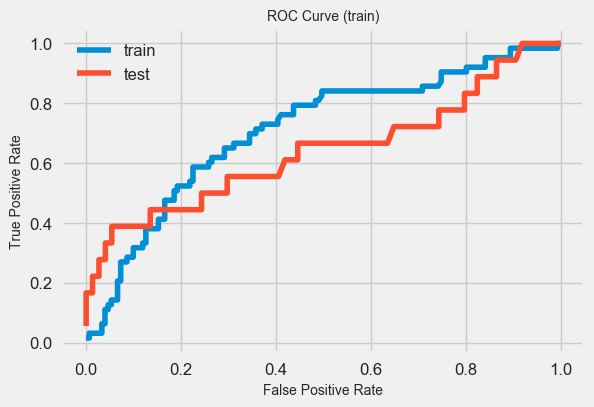

In [575]:
preds_h = gridh.predict_proba(Xh_train_scaled)
fpr_train, tpr_train, _ = roc_curve(yh_train-1, preds_h[:,1])

plt.figure(dpi=100)
plt.plot(fpr_train, tpr_train, label="train")
plt.plot(fpr, tpr, label="test")
plt.legend()

plt.xlabel("False Positive Rate", fontsize=10)
plt.ylabel("True Positive Rate", fontsize=10)
plt.title("ROC Curve (train)", fontsize=10);